Import the nessecary libraries

---




In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mount google drive to retrieve the data set

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
filename = '/content/gdrive/My Drive/Colab Notebooks/EURUSD_PERIOD_H1_exported chart data V6.xlsx' 

In [0]:
df_eurusd_in = pd.read_excel(filename)

In [0]:
df_eurusd = df_eurusd_in.drop(columns=['Date', 'Time'])

In [6]:
df_eurusd.head()

,O,H,L,C,USD,EUR,GBP,JPY,CHF,CAD,AUD,NZD,USDD1,EURD1,GBPD1,JPYD1,CHFD1,CADD1,AUDD1,NZDD1
0,1.0976,1.0988,1.0973,1.0976,-0.61763,1.14815,6.32954,0.87907,-9.70431,5.33156,-2.62332,-0.74305,-0.24863,0.31158,0.46058,-0.50646,0.03146,0.09080,0.15461,-0.29394
1,1.0977,1.0980,1.0964,1.0972,-0.31803,0.83890,5.80174,1.16304,-9.80277,5.31586,-2.51566,-0.48309,-0.29960,0.30925,0.52779,-0.28397,0.09846,0.01570,-0.10766,-0.25996
2,1.0971,1.0981,1.0955,1.0963,-0.05180,0.29848,5.19617,1.29614,-9.17637,5.11450,-2.64126,-0.03586,-0.26623,0.54042,0.60558,-0.13310,-0.62640,0.20136,0.12560,-0.44723
3,1.0963,1.0976,1.0959,1.0963,-0.08528,-0.07527,4.65955,1.31858,-8.37627,5.10096,-2.89636,0.35407,0.03348,0.37375,0.53661,-0.02244,-0.80011,0.01354,0.25510,-0.38993
4,1.0962,1.0977,1.0960,1.0973,0.01977,-0.34122,4.20290,0.93859,-7.73559,5.24278,-3.03372,0.70647,-0.10505,0.26595,0.45665,0.37999,-0.64068,-0.14182,0.13736,-0.35240


In [7]:
df_eurusd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99900 entries, 0 to 99899
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   O       99900 non-null  float64
 1   H       99900 non-null  float64
 2   L       99900 non-null  float64
 3   C       99900 non-null  float64
 4   USD     99900 non-null  float64
 5   EUR     99900 non-null  float64
 6   GBP     99900 non-null  float64
 7   JPY     99900 non-null  float64
 8   CHF     99900 non-null  float64
 9   CAD     99900 non-null  float64
 10  AUD     99900 non-null  float64
 11  NZD     99900 non-null  float64
 12  USDD1   99900 non-null  float64
 13  EURD1   99900 non-null  float64
 14  GBPD1   99900 non-null  float64
 15  JPYD1   99900 non-null  float64
 16  CHFD1   99900 non-null  float64
 17  CADD1   99900 non-null  float64
 18  AUDD1   99900 non-null  float64
 19  NZDD1   99900 non-null  float64
dtypes: float64(20)
memory usage: 15.2 MB


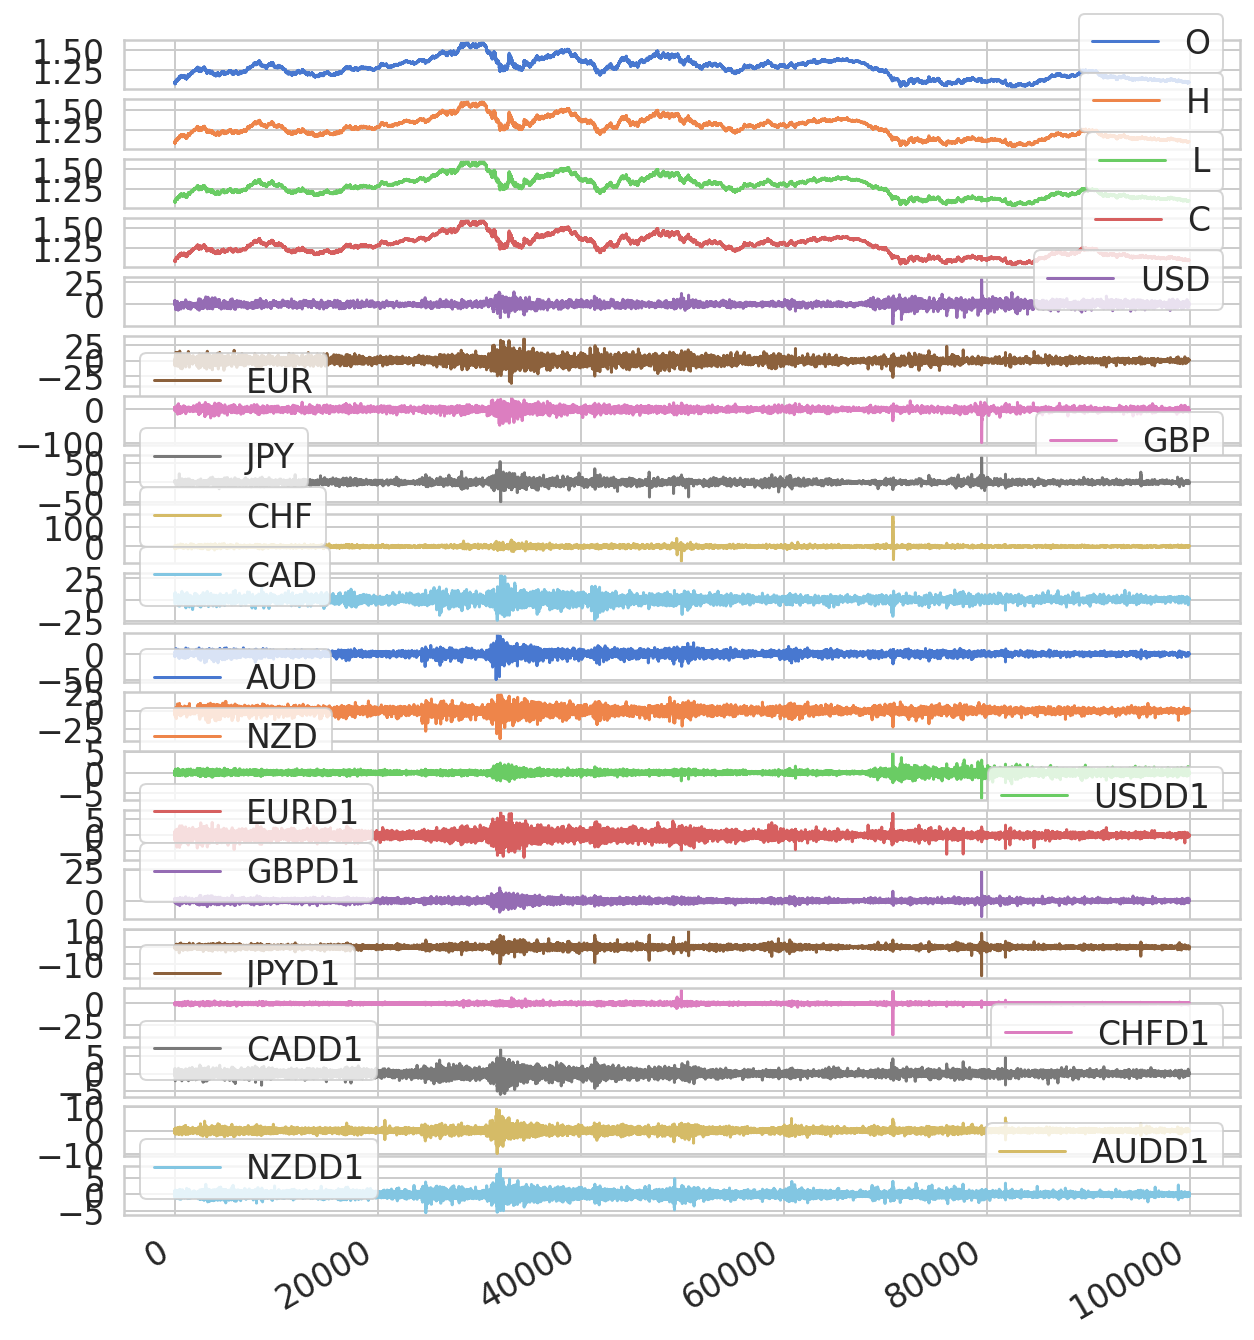

In [8]:
df_eurusd.plot(figsize=(10, 12), subplots=True); 

In [9]:
df_eurusd.describe().round(4) 

,O,H,L,C,USD,EUR,GBP,JPY,CHF,CAD,AUD,NZD,USDD1,EURD1,GBPD1,JPYD1,CHFD1,CADD1,AUDD1,NZDD1
count,99900.0000,99900.0000,99900.0000,99900.0000,99900.0000,99900.0000,99900.0000,99900.0000,99900.0000,99900.0000,99900.0000,99900.0000,99900.0000,99900.0000,99900.0000,99900.0000,99900.0000,99900.0000,99900.0000,99900.0000
mean,1.2680,1.2691,1.2670,1.2680,-0.0034,-0.0037,-0.0744,0.0133,0.0531,0.0043,0.0034,0.0074,-0.0000,0.0000,0.0002,-0.0000,-0.0001,0.0001,-0.0000,-0.0000
std,0.1202,0.1204,0.1201,0.1202,2.2593,4.0400,5.0726,4.1829,4.3622,3.0120,3.9834,3.6025,0.2964,0.6407,0.7972,0.5987,0.6136,0.4868,0.5977,0.5318
min,1.0355,1.0370,1.0339,1.0355,-22.2913,-36.3080,-98.1756,-49.5445,-74.5878,-24.1226,-50.0990,-37.9531,-6.1741,-6.9563,-12.9403,-17.1971,-36.6199,-5.8150,-9.7575,-5.5958
25%,1.1692,1.1701,1.1683,1.1691,-1.2686,-2.0675,-2.7114,-2.1679,-1.9935,-1.5594,-1.9142,-1.7919,-0.1516,-0.2924,-0.3796,-0.2868,-0.2670,-0.2261,-0.2829,-0.2701
50%,1.2729,1.2741,1.2716,1.2729,-0.0278,0.0081,-0.0179,-0.0767,-0.0181,0.0217,0.1085,0.1488,-0.0002,-0.0008,0.0015,-0.0024,0.0001,0.0028,0.0035,0.0013
75%,1.3517,1.3526,1.3507,1.3517,1.2403,2.0660,2.6729,2.0529,1.9880,1.5902,2.0930,2.0306,0.1507,0.2941,0.3807,0.2825,0.2693,0.2273,0.2878,0.2689
max,1.6015,1.6038,1.5992,1.6016,28.0799,35.1257,34.3236,64.0447,153.9755,27.7479,37.1190,22.5573,4.7085,7.1758,23.7841,9.6583,15.3554,6.7199,9.2440,8.0288


In [10]:
print("checking if any null values are present\n", df_eurusd.isna().sum())

checking if any null values are present
 O        0
H        0
L        0
C        0
USD      0
EUR      0
GBP      0
JPY      0
CHF      0
CAD      0
AUD      0
NZD      0
USDD1    0
EURD1    0
GBPD1    0
JPYD1    0
CHFD1    0
CADD1    0
AUDD1    0
NZDD1    0
dtype: int64


In [0]:
df_eurusd.dropna(inplace=True)

In [12]:
print("checking if any null values are present\n", df_eurusd.isna().sum())

checking if any null values are present
 O        0
H        0
L        0
C        0
USD      0
EUR      0
GBP      0
JPY      0
CHF      0
CAD      0
AUD      0
NZD      0
USDD1    0
EURD1    0
GBPD1    0
JPYD1    0
CHFD1    0
CADD1    0
AUDD1    0
NZDD1    0
dtype: int64


In [0]:
df_train, df_test = train_test_split(df_eurusd, train_size=0.8, test_size=0.2, shuffle=False)

In [0]:
df_train = df_train.copy()

In [0]:
df_test = df_test.copy()

In [16]:
print("Train and Test size", len(df_train), len(df_test))
type(df_train)

Train and Test size 79920 19980


pandas.core.frame.DataFrame

In [0]:
f_columns = ["O","H","L","USD","EUR","GBP","JPY","CHF","CAD","AUD","NZD","USD","EURD1","GBPD1","JPYD1","CHFD1","CADD1","AUDD1","NZDD1"]

from sklearn.preprocessing import RobustScaler

f_transformer = RobustScaler()

f_transformer = f_transformer.fit(df_train[f_columns].to_numpy())

df_train.loc[:, f_columns] = f_transformer.transform(df_train[f_columns].to_numpy())

df_test.loc[:, f_columns] = f_transformer.transform(df_test[f_columns].to_numpy())


c_transformer = RobustScaler()

c_transformer = c_transformer.fit(df_train[['C']])

df_train['C'] = c_transformer.transform(df_train[['C']])

df_test['C'] = c_transformer.transform(df_test[['C']])


In [18]:
df_train.shape

# type(df_train)

(79920, 20)

In [19]:
df_test.shape

(19980, 20)

In [20]:
df_train.describe().round(4) 

,O,H,L,C,USD,EUR,GBP,JPY,CHF,CAD,AUD,NZD,USDD1,EURD1,GBPD1,JPYD1,CHFD1,CADD1,AUDD1,NZDD1
count,79920.0000,79920.0000,79920.0000,79920.0000,79920.0000,79920.0000,79920.0000,79920.0000,79920.0000,79920.0000,79920.0000,79920.0000,79920.0000,79920.0000,79920.0000,79920.0000,79920.0000,79920.0000,79920.0000,79920.0000
mean,-0.0213,-0.0201,-0.0215,-0.0213,0.0167,-0.0035,-0.0159,0.0251,0.0172,-0.0076,-0.0308,-0.0457,-0.0000,0.0001,-0.0026,0.0084,-0.0009,-0.0072,-0.0090,-0.0033
std,0.8078,0.8078,0.8064,0.8077,0.9288,0.9180,0.9210,0.9801,1.0335,0.9405,0.9378,0.9030,0.2845,1.0131,1.0220,1.0409,1.0894,1.0271,0.9877,0.9335
min,-1.8622,-1.8579,-1.8596,-1.8619,-9.2421,-7.5863,-16.8792,-10.8589,-16.1300,-7.0555,-10.8593,-8.8335,-6.1741,-10.0839,-15.6007,-28.1451,-59.6010,-11.4092,-14.8231,-9.0838
25%,-0.5480,-0.5471,-0.5479,-0.5481,-0.4953,-0.5039,-0.5063,-0.4915,-0.4979,-0.4983,-0.5084,-0.5170,-0.1452,-0.4994,-0.5039,-0.4974,-0.4984,-0.5077,-0.5045,-0.5036
50%,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0007,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.4520,0.4529,0.4521,0.4519,0.5047,0.4961,0.4937,0.5085,0.5021,0.5017,0.4916,0.4830,0.1435,0.5006,0.4961,0.5026,0.5016,0.4923,0.4955,0.4964
max,2.1718,2.1805,2.1604,2.1723,11.6919,7.3377,5.8988,14.0898,33.3113,8.0980,7.9862,5.1698,4.7085,10.4024,28.6665,15.8200,24.9907,13.1689,14.0257,13.0254


In [0]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [22]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X2_train, y2_train = create_dataset(df_train, df_train.C, time_steps)
X2_test, y2_test = create_dataset(df_test, df_test.C, time_steps)

print(X2_train.shape, y2_train.shape)

(79910, 10, 20) (79910,)


In [23]:
X2_train.shape

(79910, 10, 20)

In [24]:
X2_test.shape

(19970, 10, 20)

In [25]:
y2_train.shape

(79910,)

In [26]:
y2_test.shape

(19970,)

In [27]:
#import sys 
#from __future__ import absolute_import, division, print_function, unicode_literals
#import tensorflow as tf
#from tensorflow import keras
#py_ver = sys.version 
k_ver = tf.keras.__version__ 
tf_ver = tf.__version__ 
#print("Using Python version " + str(py_ver)) 
print("Using Keras version " + str(k_ver)) 
print("Using TensorFlow version " + str(tf_ver))

Using Keras version 2.3.0-tf
Using TensorFlow version 2.2.0-rc2


In [0]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X2_train.shape[1], X2_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [29]:
history = model.fit(
    X2_train, y2_train, 
    epochs=5, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

2248/2248 [==============================] - 42s 19ms/step - loss: 0.0138 - val_loss: 0.0038
Epoch 2/5
2248/2248 [==============================] - 41s 18ms/step - loss: 0.0032 - val_loss: 0.0061
Epoch 3/5
2248/2248 [==============================] - 41s 18ms/step - loss: 0.0029 - val_loss: 0.0041
Epoch 4/5
2248/2248 [==============================] - 41s 18ms/step - loss: 0.0020 - val_loss: 0.0027
Epoch 5/5
2248/2248 [==============================] - 41s 18ms/step - loss: 0.0017 - val_loss: 

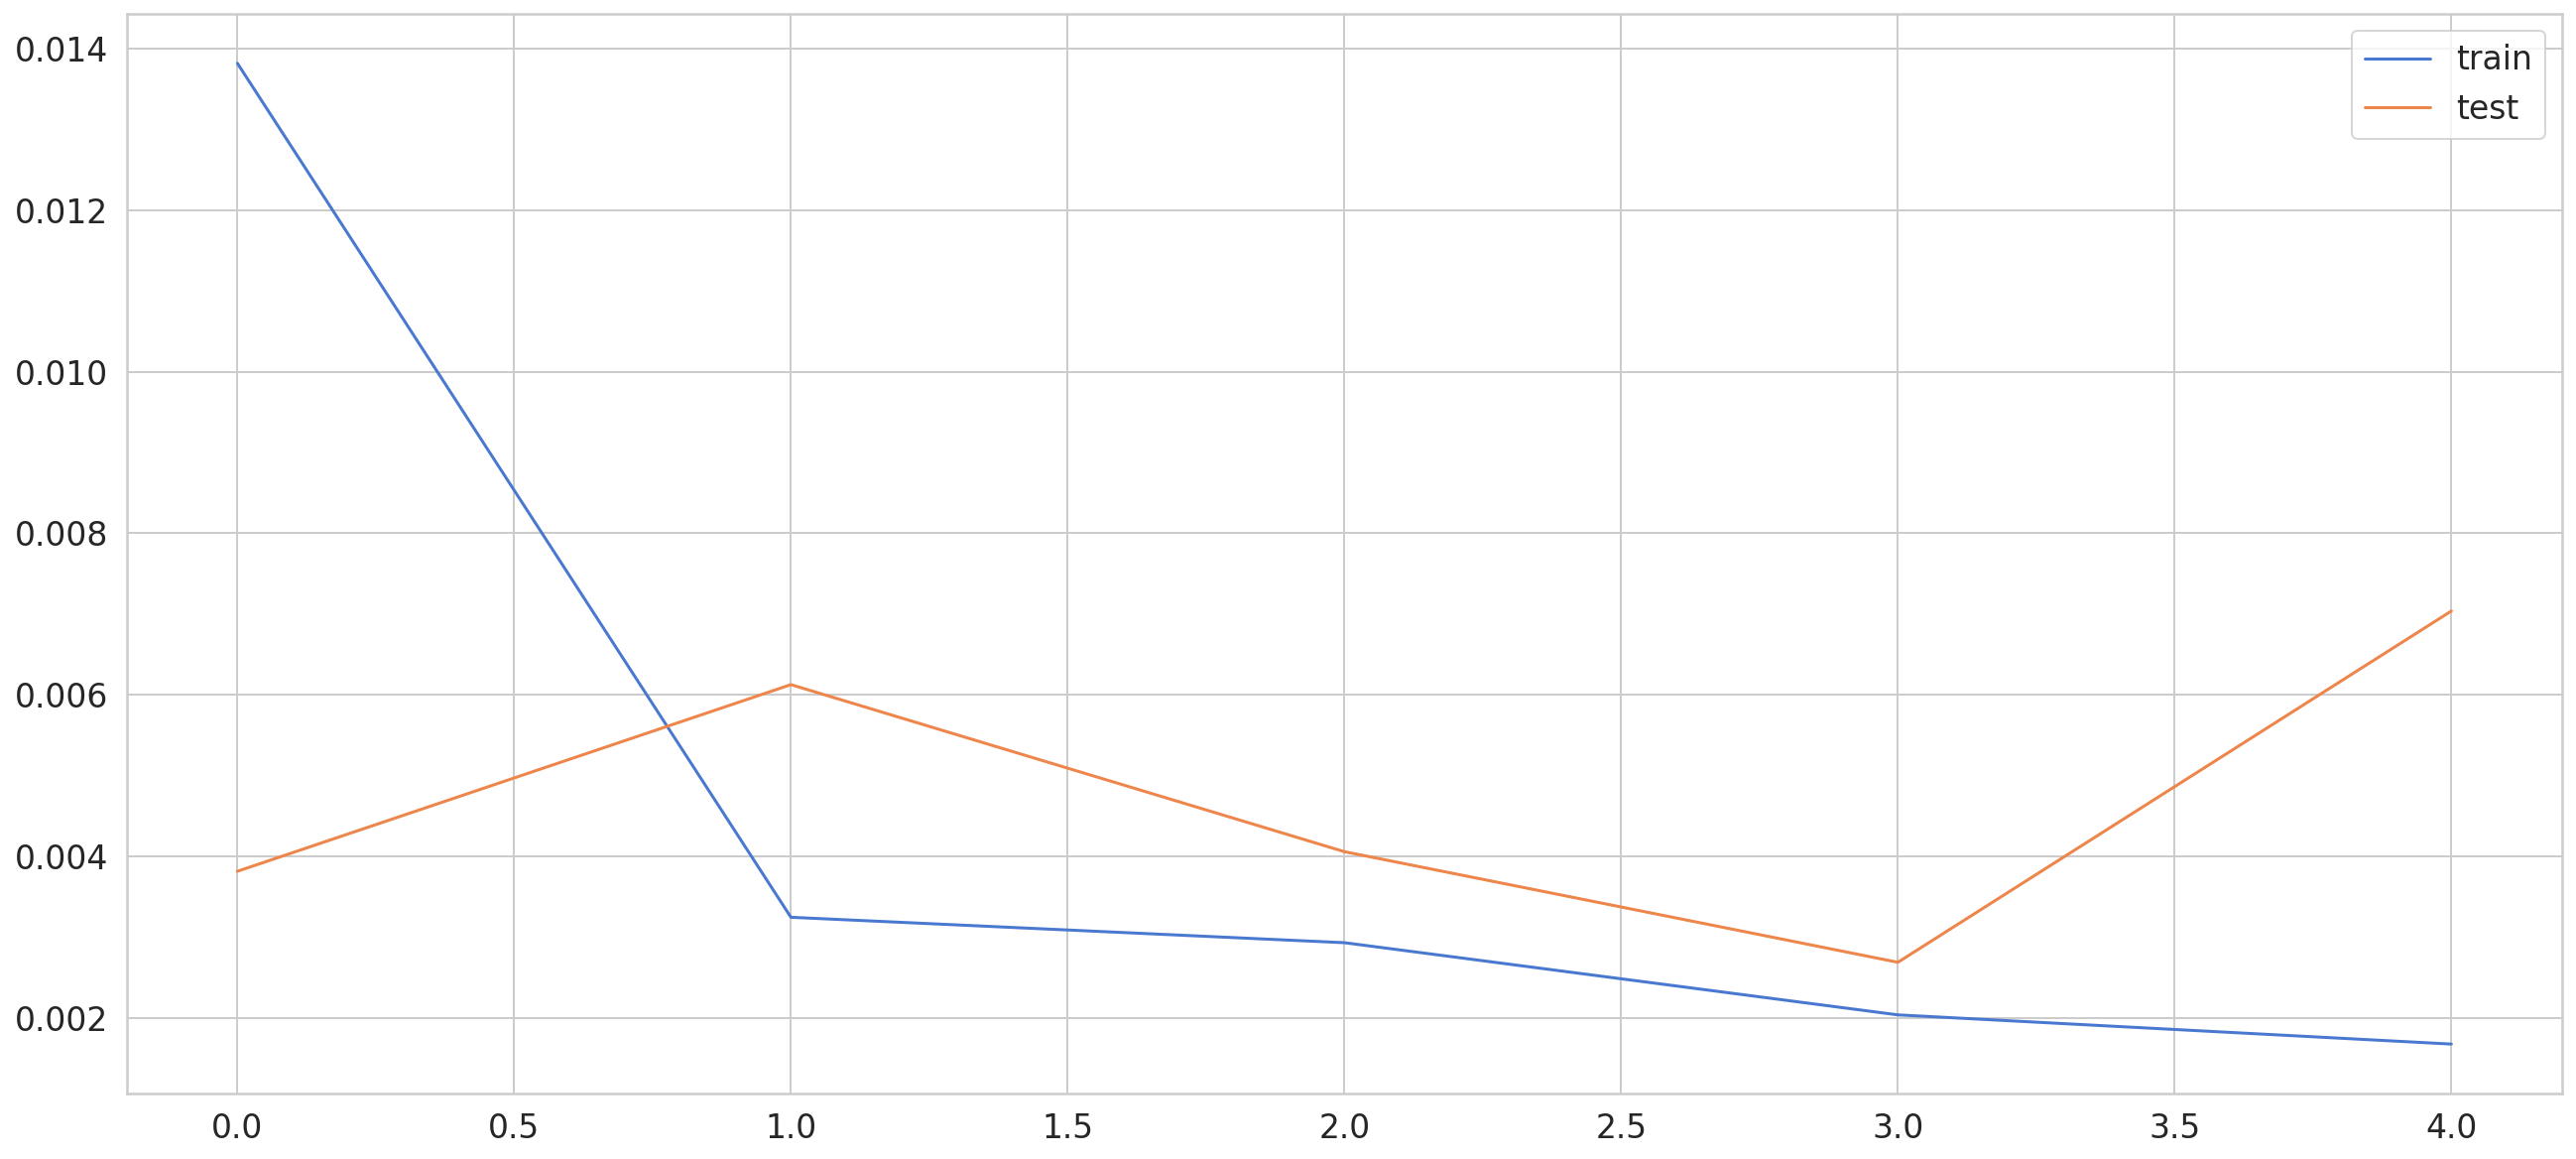

In [30]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [0]:
y2_pred = model.predict(X2_test)

In [0]:
y_train_inv = c_transformer.inverse_transform(y2_train.reshape(1, -1))
y_test_inv = c_transformer.inverse_transform(y2_test.reshape(1, -1))
y_pred_inv = c_transformer.inverse_transform(y2_pred)

In [33]:
y2_pred

array([[-1.4104408],
       [-1.4067119],
       [-1.4075116],
       ...,
       [-1.393658 ],
       [-1.399578 ],
       [-1.392155 ]], dtype=float32)

In [34]:
y_pred_inv

array([[1.1092913],
       [1.1098037],
       [1.1096939],
       ...,
       [1.1115974],
       [1.1107839],
       [1.111804 ]], dtype=float32)

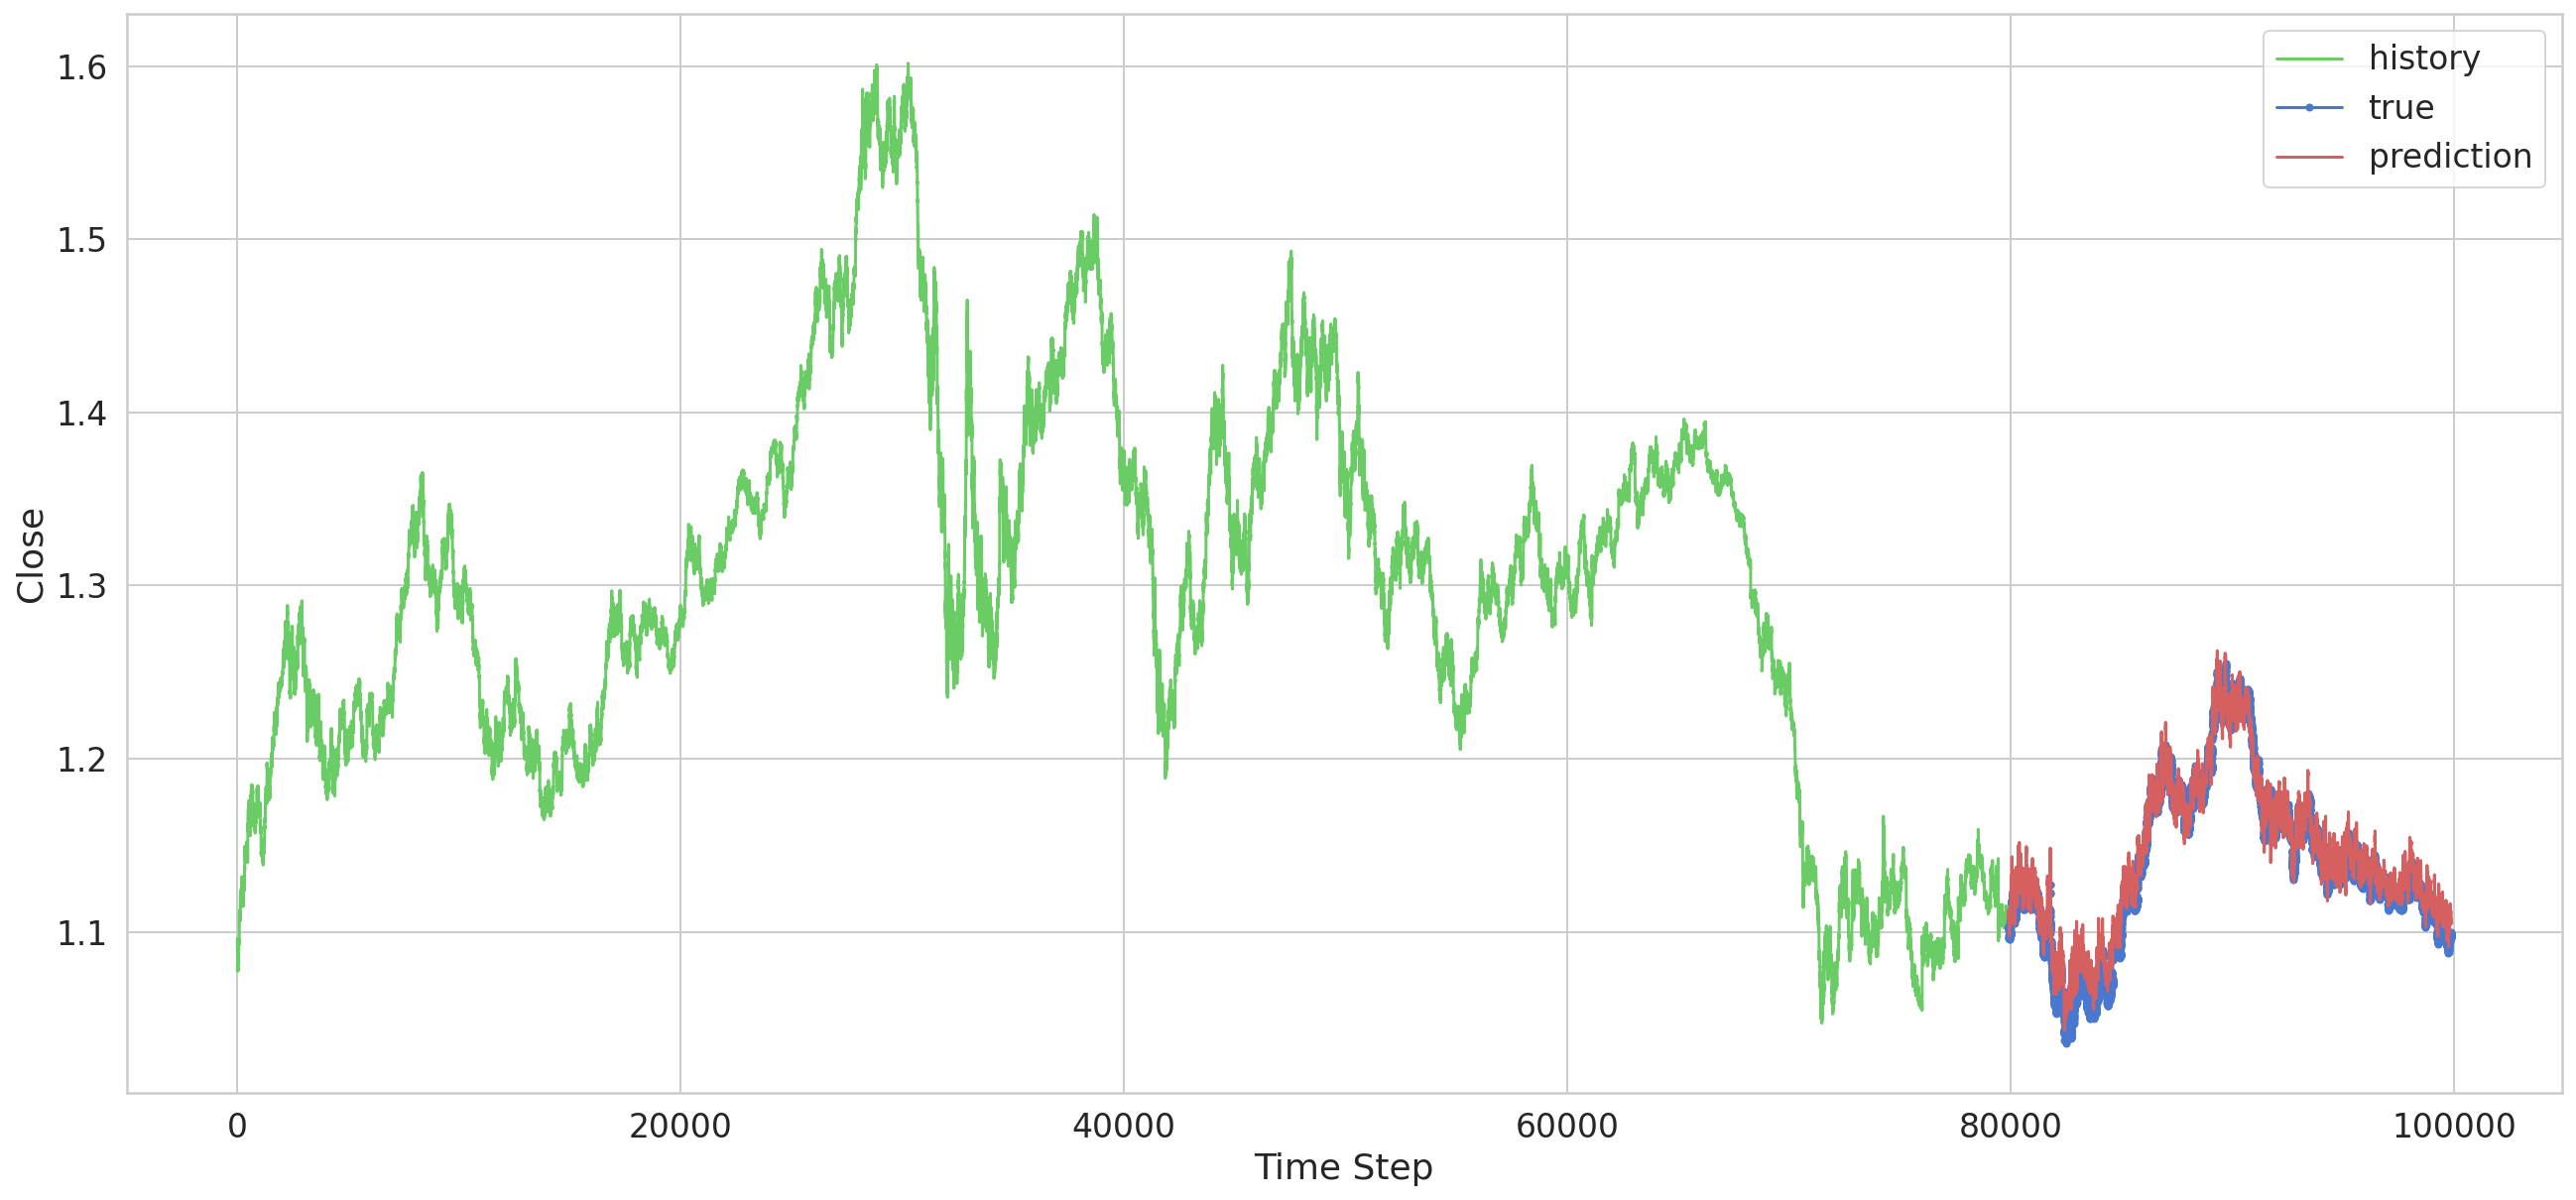

In [35]:
plt.plot(np.arange(0, len(y2_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y2_train), len(y2_train) + len(y2_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y2_train), len(y2_train) + len(y2_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Close')
plt.xlabel('Time Step')
plt.legend()
plt.show();

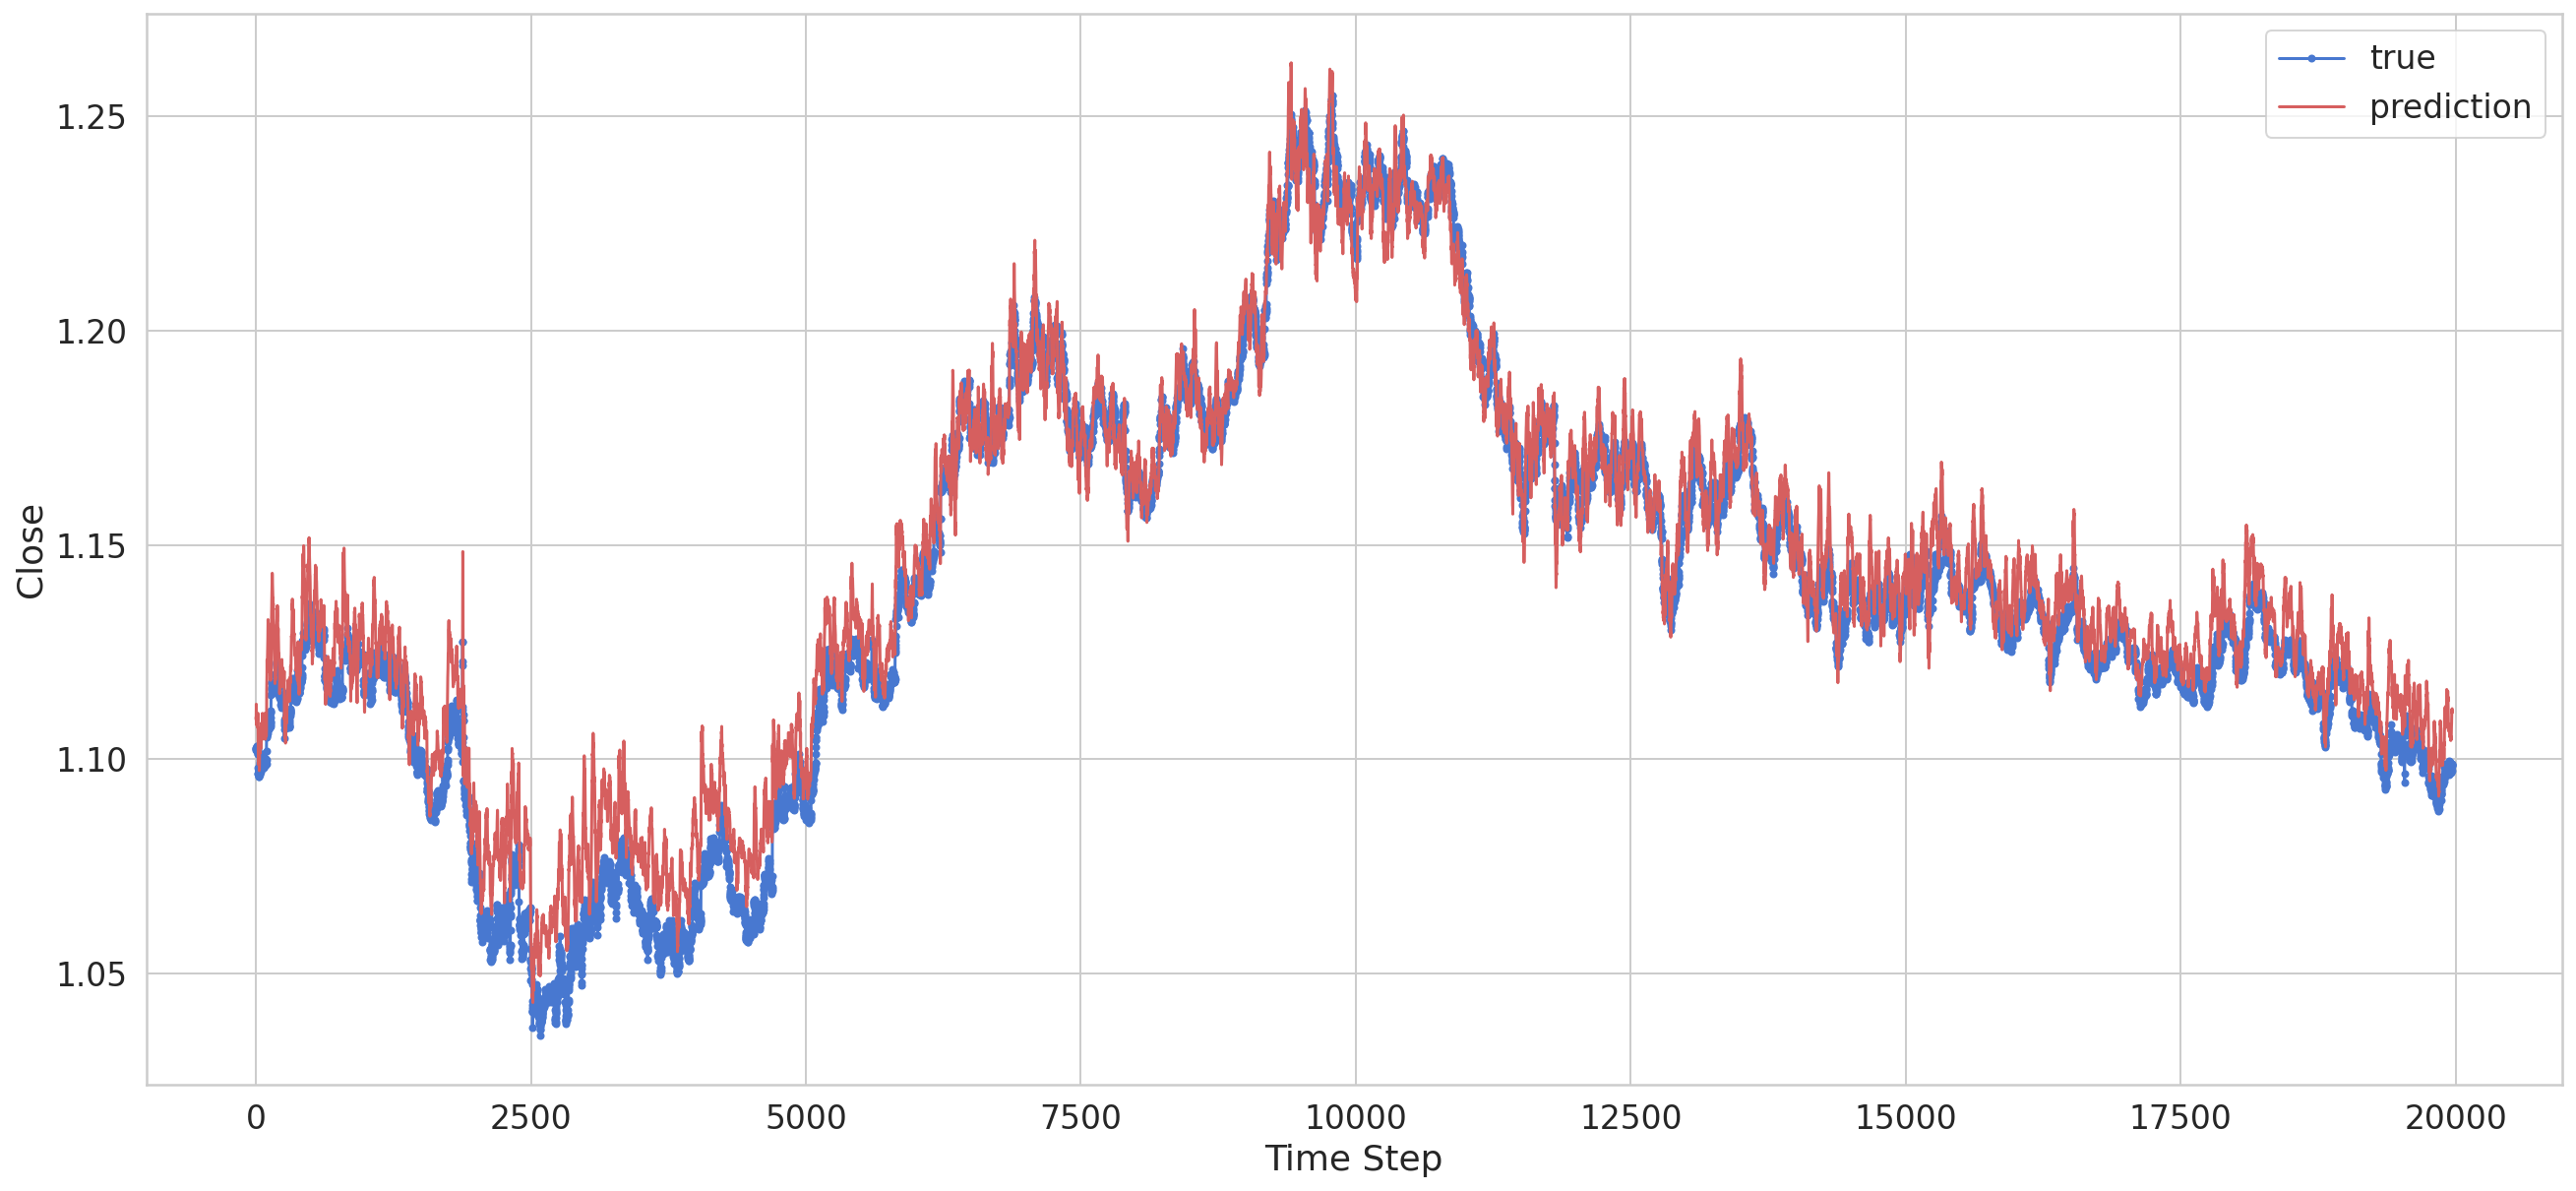

In [36]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Close')
plt.xlabel('Time Step')
plt.legend()
plt.show();